In [1]:
!pip install langdetect

In [2]:
#usecase: analysing amazon reviews
#Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from langdetect import detect
import string

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ved
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_excel('dataset.xlsx')
df

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."
...,...,...,...
1435,Excellent mobile,5,Excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve..."
1437,Good value for money,5,Battery life is good but camera clarity could ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied....."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [6]:
df.shape

(1440, 3)

In [7]:
df.columns

Index(['title', 'rating', 'body'], dtype='object')

In [8]:
df.isnull().sum()

title     0
rating    0
body      0
dtype: int64

In [9]:
df.describe()

,rating
count,1440.000000
mean,3.173611
std,1.584453
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [10]:
df.dtypes

title     object
rating     int64
body      object
dtype: object

In [11]:
#Language dedect
data = df[df['body'].apply(lambda x: detect(x) != 'hi')]
data

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."
...,...,...,...
1435,Excellent mobile,5,Excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve..."
1437,Good value for money,5,Battery life is good but camera clarity could ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied....."


In [12]:
# Make sure to use the filtered data for the rest of the notebook
df = data
df.reset_index(drop=True, inplace=True) 
print(f"Shape of the dataframe after filtering: {df.shape}")

Shape of the dataframe after filtering: (1429, 3)


In [13]:
#Distinct values of rating and its count
print(f"rating value count: \n{data['rating'].value_counts()}")

rating value count: 
rating
5    418
1    378
4    309
3    199
2    125
Name: count, dtype: int64


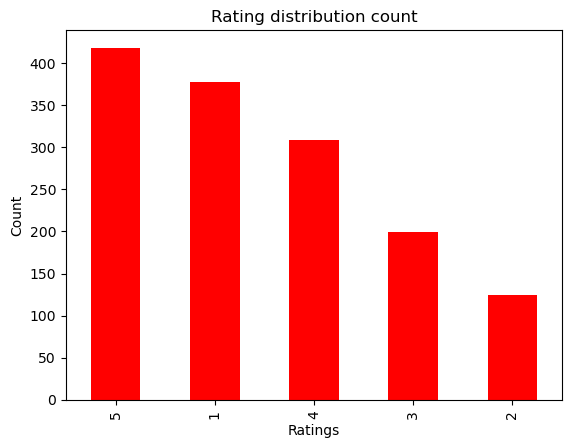

In [14]:
#Bar plot to visualize the total counts of each rating
data['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [15]:
# Sentiment Mapping
def get_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [16]:
df['sentiment'] = df['rating'].apply(get_sentiment)
df['sentiment']

C:\Users\Ved Patil\AppData\Local\Temp\ipykernel_19904\2896182704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(get_sentiment)


0       Negative
1        Neutral
2       Positive
3       Negative
4       Negative
          ...   
1424    Positive
1425    Negative
1426    Positive
1427    Negative
1428    Positive
Name: sentiment, Length: 1429, dtype: object

In [17]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [18]:
df['clean_body'] = df['body'].astype(str).apply(clean_text)

C:\Users\Ved Patil\AppData\Local\Temp\ipykernel_19904\4033531312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_body'] = df['body'].astype(str).apply(clean_text)


In [19]:
text_data = {
    sentiment: " ".join(df[df['sentiment'] == sentiment]['clean_body'])
    for sentiment in ['Positive', 'Neutral', 'Negative']
}


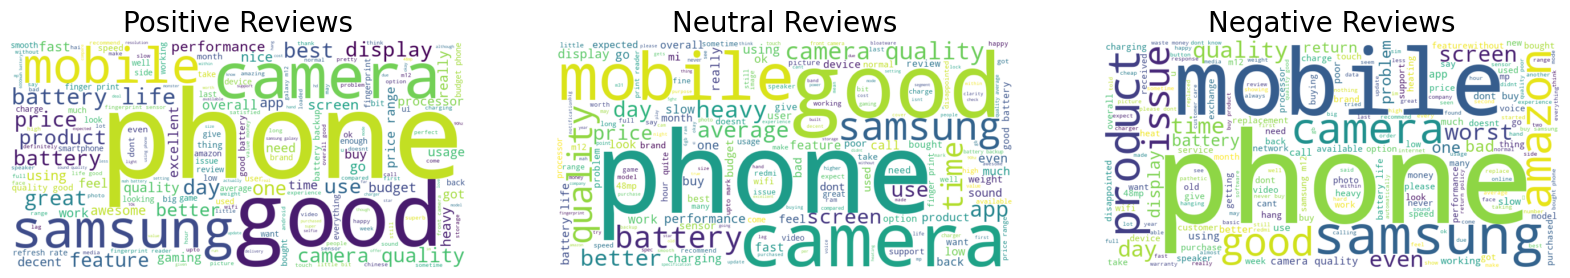

In [20]:
plt.figure(figsize=(20, 8))
for i, (sentiment, text) in enumerate(text_data.items(), 1):
    plt.subplot(1, 3, i)
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'{sentiment} Reviews', fontsize=20)
    plt.axis('off')


In [21]:
df

,title,rating,body,sentiment,clean_body
0,Horrible product,1,Very disappointed with the overall performance...,Negative,disappointed overall performance samsung
1,Camera quality is not like 48 megapixel,3,Camera quality is low,Neutral,camera quality low
2,Overall,4,"Got the mobile on the launch date,Battery must...",Positive,got mobile launch datebattery must appreciated...
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,Negative,1 doesnt work 50ghz wifi frequency 24ghz old s...
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",Negative,worth buyingfaulty software poor display quali...
...,...,...,...,...,...
1424,Excellent mobile,5,Excellent mobile,Positive,excellent mobile
1425,Never expected from samsung,1,"All over mobile performance is very poor, neve...",Negative,mobile performance poor never buy one product ...
1426,Good value for money,5,Battery life is good but camera clarity could ...,Positive,battery life good camera clarity could little ...
1427,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied.....",Negative,bad product highly dissatisfied specifically c...


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df_filtered=df[["sentiment","clean_body"]]

In [24]:
df_filtered

,sentiment,clean_body
0,Negative,disappointed overall performance samsung
1,Neutral,camera quality low
2,Positive,got mobile launch datebattery must appreciated...
3,Negative,1 doesnt work 50ghz wifi frequency 24ghz old s...
4,Negative,worth buyingfaulty software poor display quali...
...,...,...
1424,Positive,excellent mobile
1425,Negative,mobile performance poor never buy one product ...
1426,Positive,battery life good camera clarity could little ...
1427,Negative,bad product highly dissatisfied specifically c...


In [25]:
tf=TfidfVectorizer()
x=tf.fit_transform(df_filtered['clean_body'])
y=df_filtered['sentiment']

In [26]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Logistic regresssion Model

In [29]:
LRmodel=LogisticRegression(max_iter=1000)

In [30]:
LRmodel.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [31]:
y_predLR=LRmodel.predict(X_test)

In [32]:
#Evaluation
print("Classification Report:\n")
print(classification_report(y_test,y_predLR))

Classification Report:

              precision    recall  f1-score   support

    Negative       0.75      0.81      0.78       101
     Neutral       0.67      0.05      0.09        40
    Positive       0.75      0.90      0.82       145

    accuracy                           0.75       286
   macro avg       0.72      0.59      0.56       286
weighted avg       0.74      0.75      0.70       286



#MultinomialNB

In [34]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [35]:
y_predmnb=model.predict(X_test)

In [36]:
#Evaluation
print("Classification Report:\n")
print(classification_report(y_test,y_predmnb))

Classification Report:

              precision    recall  f1-score   support

    Negative       0.85      0.59      0.70       101
     Neutral       0.00      0.00      0.00        40
    Positive       0.66      0.97      0.78       145

    accuracy                           0.70       286
   macro avg       0.50      0.52      0.49       286
weighted avg       0.63      0.70      0.64       286



C:\Users\Ved Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ved Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ved Patil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# SVM Model

In [38]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)


LinearSVC()

In [39]:
y_predsvm=model.predict(X_test)

In [40]:
#Evaluation
print("Classification Report:\n")
print(classification_report(y_test,y_predsvm))

Classification Report:

              precision    recall  f1-score   support

    Negative       0.72      0.80      0.76       101
     Neutral       0.36      0.12      0.19        40
    Positive       0.78      0.86      0.81       145

    accuracy                           0.73       286
   macro avg       0.62      0.59      0.59       286
weighted avg       0.70      0.73      0.71       286



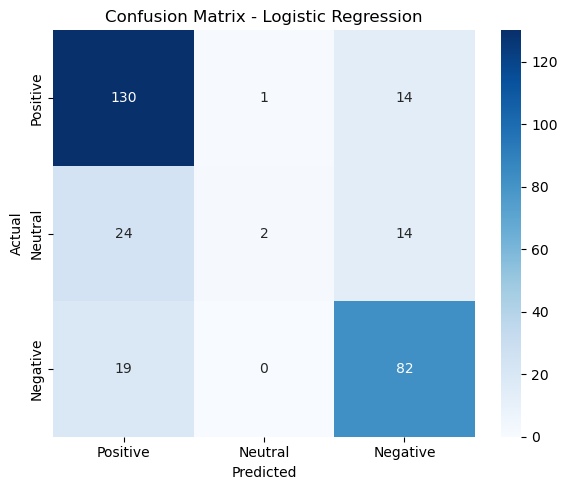

In [41]:
#Confusion Matrix
labels = ["Positive", "Neutral", "Negative"]
conf_matrix = confusion_matrix(y_test, y_predLR, labels=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Logistic Regression: 0.7483
Naive Bayes: 0.7028
SVM: 0.7343
Random Forest: 0.7168


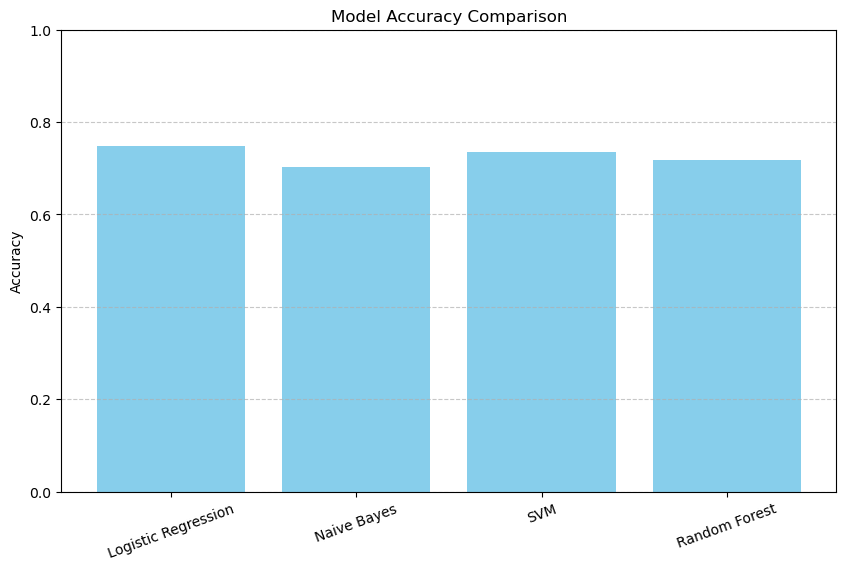

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier()
}
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name}: {acc:.4f}")
# Plotting
plt.figure(figsize=(10,6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)
grid.fit(X_train,y_train)
print("Best params:",grid.best_params_)
print("Best score:",grid.best_score_)

Best params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.7751551367501724


In [44]:
import pickle

with open("model_and_vectorizer.pkl", "wb") as f:
    pickle.dump({"model": LRmodel, "vectorizer": tf}, f)
